<a href="https://colab.research.google.com/github/SruthyMencherychinnan/Leopard/blob/master/Fake_Job_Posting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
df=pd.read_csv('/content/fake_job_postings.csv')
df

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0


In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [ ]:
df.tail()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
17875,17876,Account Director - Distribution,"CA, ON, Toronto",Sales,NaN,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Sales,0,CA
17876,17877,Payroll Accountant,"US, PA, Philadelphia",Accounting,NaN,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Internet,Accounting/Auditing,0,US
17877,17878,Project Cost Control Staff Engineer - Cost Con...,"US, TX, Houston",NaN,NaN,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,Full-time,NaN,NaN,NaN,NaN,0,US
17878,17879,Graphic Designer,"NG, LA, Lagos",NaN,NaN,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,Contract,Not Applicable,Professional,Graphic Design,Design,0,NG
17879,17880,Web Application Developers,"NZ, N, Wellington",Engineering,NaN,Vend is looking for some awesome new talent to...,Who are we?Vend is an award winning web based ...,We want to hear from you if:You have an in-dep...,NaN,0,1,1,Full-time,Mid-Senior level,NaN,Computer Software,Engineering,0,NZ


In [ ]:
df.columns

Index(['job_id', 'title', 'location', 'department', 'salary_range',
       'company_profile', 'description', 'requirements', 'benefits',
       'telecommuting', 'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'country'],
      dtype='object')

In [ ]:
df.isna().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
country                  346
dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
df.corr()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
job_id,1.000000,-0.004559,-0.014539,-0.087025,0.079872
telecommuting,-0.004559,1.000000,-0.019836,0.020345,0.034523
has_company_logo,-0.014539,-0.019836,1.000000,0.233932,-0.261971
has_questions,-0.087025,0.020345,0.233932,1.000000,-0.091627
fraudulent,0.079872,0.034523,-0.261971,-0.091627,1.000000


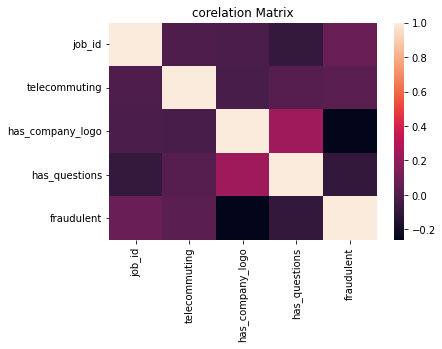

In [ ]:
plt.title('corelation Matrix')
sns.heatmap(df.corr())


In [ ]:
df['fraudulent'].value_counts()


0    17014
1      866
Name: fraudulent, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


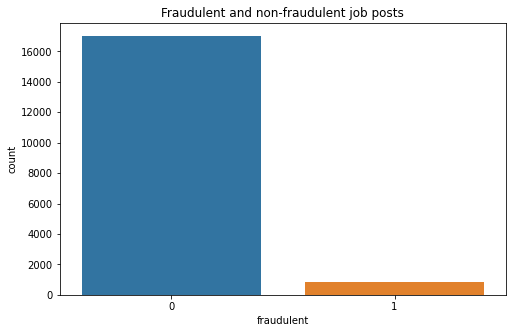

In [ ]:
#Fraudulent and non-fraudulent job posts
plt.figure(figsize=(8,5))
plt.title('Fraudulent and non-fraudulent job posts')
sns.countplot('fraudulent',data=df)

In [ ]:
df['required_experience'].value_counts()


Mid-Senior level    3809
Entry level         2697
Associate           2297
Not Applicable      1116
Director             389
Internship           381
Executive            141
Name: required_experience, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


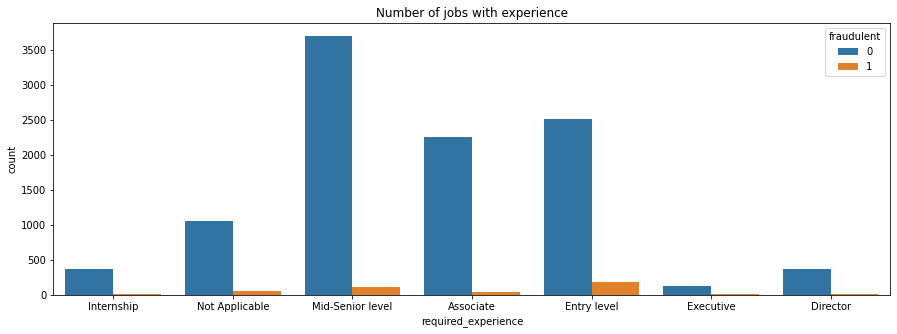

In [ ]:
#Expected experience
plt.figure(figsize=(15,5))
plt.title('Number of jobs with experience')
sns.countplot('required_experience',data=df,hue='fraudulent')


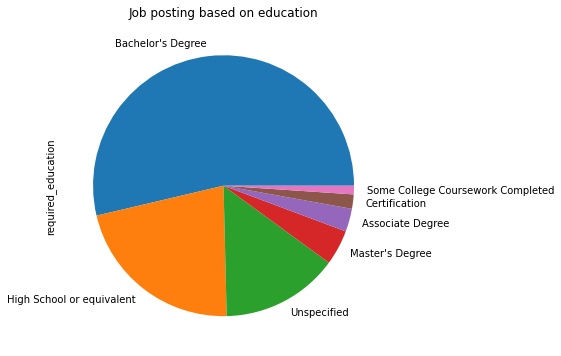

In [ ]:
plt.figure(figsize=(15,6))
plt.title('Job posting based on education')
df['required_education'].value_counts()[:7].plot(kind='pie')

In [ ]:
#Number of jobs posted based on countries
new=df['location'].str.split(",",n=1,expand=True)
df['country']=new[0]


In [ ]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0,US
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0,US
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US


In [ ]:
df['country'].value_counts()[:14]

US    10656
GB     2384
GR      940
CA      457
DE      383
NZ      333
IN      276
AU      214
PH      132
NL      127
BE      117
IE      114
SG       80
HK       77
Name: country, dtype: int64

Text(0.5, 0, 'countries')

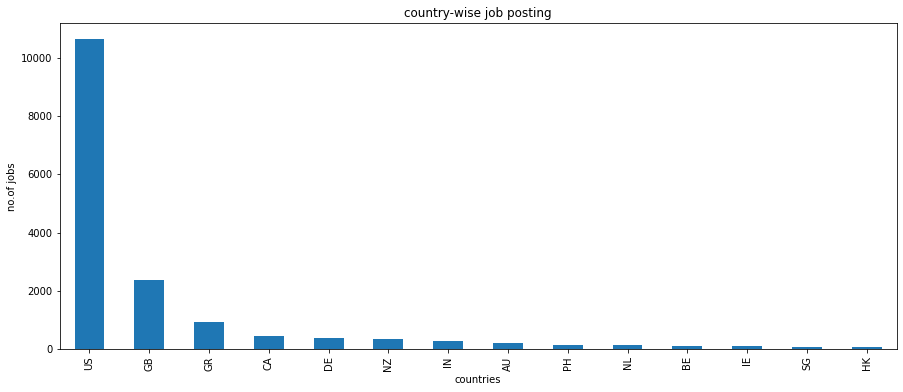

In [ ]:
plt.figure(figsize=(15,6))
plt.title('country-wise job posting')
df['country'].value_counts()[:14].plot(kind='bar')
plt.ylabel('no.of jobs')
plt.xlabel('countries')

In [ ]:
plt.figure(figsize=(500,200))
plt.title('Fraudulent and non-fraudulent job posting in countries')
y=df['country']
sns.countplot(y,data=df,hue='fraudulent')

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


In [ ]:
df1=df.drop(['job_id','location','department','salary_range','employment_type','required_experience','required_education','industry','function','country'],axis=1)
df1

,title,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,fraudulent
0,Marketing Intern,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,0
1,Customer Service - Cloud Video Production,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,0
2,Commissioning Machinery Assistant (CMA),Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,0
3,Account Executive - Washington DC,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,0
4,Bill Review Manager,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,0
...,...,...,...,...,...,...,...,...,...
17875,Account Director - Distribution,Vend is looking for some awesome new talent to...,Just in case this is the first time you’ve vis...,To ace this role you:Will eat comprehensive St...,What can you expect from us?We have an open cu...,0,1,1,0
17876,Payroll Accountant,WebLinc is the e-commerce platform and service...,The Payroll Accountant will focus primarily on...,- B.A. or B.S. in Accounting- Desire to have f...,Health &amp; WellnessMedical planPrescription ...,0,1,1,0
17877,Project Cost Control Staff Engineer - Cost Con...,We Provide Full Time Permanent Positions for m...,Experienced Project Cost Control Staff Enginee...,At least 12 years professional experience.Abil...,NaN,0,0,0,0
17878,Graphic Designer,NaN,Nemsia Studios is looking for an experienced v...,1. Must be fluent in the latest versions of Co...,Competitive salary (compensation will be based...,0,0,1,0


In [ ]:
df1.dtypes

title               object
company_profile     object
description         object
requirements        object
benefits            object
telecommuting        int64
has_company_logo     int64
has_questions        int64
fraudulent           int64
dtype: object

In [ ]:
#OneHot Encoding
#from sklearn.compose import make_column_transformer
#from sklearn.preprocessing import OneHotEncoder
#col_trans=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['title','company_profile','description','requirements','benefits']),remainder='passthrough')
#trans_data=col_trans.fit_transform(df1)
#trans_data
dummy=pd.get_dummies(df[['title','company_profile','description','requirements','benefits']],drop_first=True)
dummy

,title_ Environmental Technician I,title_ Piping Material Engineer,"title_ Discipline Manager Civil, Structural, Marine, Architectural",title_ FEA Senior engineer,title_ Manager of Project Management Organization - Engineering,title_ Mechanical Engineering Manager,"title_ Resources Change Management, Process Excellence and Change Enablement Manager",title_ ServiceNow Consultant,title_ AUTOCAD OPERATOR,title_ Account Executive/Digital Ad Sales,...,benefits_•Competitive Salary•Paid Time off•401 (K)•Healthcare,"benefits_• Salary: negotiate based on candidate's capabilities• Working time: 9:00AM ~ 18:00PM, 5 days a week (Monday to Friday)• Social Assurance base on Vietnam Labor Law.• Annual company summer holiday trips• Be trained to improve your skills in your expertise areas• Join a young and dynamic team in a friendly and professional working environment","benefits_• Competitive salary• Competitive equity grant in a high-growth startup• Beautiful office in downtown Austin, TX• Competively priced street parking ;)","benefits_• Work as a paid intern in an exciting new start-up• Be a part of taking a fast paced start-up to the next level• Lots of learning and networking, and playing an instrumental role in allowing us to expand our services to new markets• Potential inputs and involvement in other parts of the business",benefits_• Work as a paid intern in an exciting new start-up• Be a part of taking a fast paced start-up to the next level• Lots of learning and networking• Potential inputs and involvement in other parts of the business• Develop your own marketing ideas and implement them,"benefits_● .1% stock option● Excellent health benefit plan● 3 weeks paid time off per year, plus unlimited unpaid time off● 1 day paid employee volunteerism per month● Flexible hours● Travel opportunities● Room for growth, including leading your own team● Fun and easy-going environment","benefits_● Flexible Scheduling (Full and PT positions)● Competitive wages● Performance reviews &amp; incentives● On the job training &amp; caregiver support● Effective ""Zone Scheduling"" (to decrease mileage &amp; travel times)","benefits_● .1% stock option● 100% employer contributed health benefit plan● Flexible Paid Time Off (Unlimited)● 1 day paid employee volunteerism per month● Flexible hours● Travel opportunities● Room for growth, including leading your own team● Fun and easy-going environment","benefits_● .1% stock option● Excellent health benefit plan● 3 weeks paid time off per year, plus unlimited unpaid time off● 1 day paid employee volunteerism per month● Flexible hours● Travel opportunities● Room for growth, including leading your own team● Fun and easy-going environment",benefits_ The opportunity to move up rapidly within a fast-growing organisation Client contact and travel opportunities Personalised education and training plan to enhance marketing and wine knowledge Full immersion in the global wine industry Contributory company pension scheme No dull moments
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17876,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17878,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df_con=pd.concat([df1,dummy],axis=1)
df_new=df_con.drop(['title','company_profile','description','requirements','benefits'],axis=1)
df_new

,telecommuting,has_company_logo,has_questions,fraudulent,title_ Environmental Technician I,title_ Piping Material Engineer,"title_ Discipline Manager Civil, Structural, Marine, Architectural",title_ FEA Senior engineer,title_ Manager of Project Management Organization - Engineering,title_ Mechanical Engineering Manager,...,benefits_•Competitive Salary•Paid Time off•401 (K)•Healthcare,"benefits_• Salary: negotiate based on candidate's capabilities• Working time: 9:00AM ~ 18:00PM, 5 days a week (Monday to Friday)• Social Assurance base on Vietnam Labor Law.• Annual company summer holiday trips• Be trained to improve your skills in your expertise areas• Join a young and dynamic team in a friendly and professional working environment","benefits_• Competitive salary• Competitive equity grant in a high-growth startup• Beautiful office in downtown Austin, TX• Competively priced street parking ;)","benefits_• Work as a paid intern in an exciting new start-up• Be a part of taking a fast paced start-up to the next level• Lots of learning and networking, and playing an instrumental role in allowing us to expand our services to new markets• Potential inputs and involvement in other parts of the business",benefits_• Work as a paid intern in an exciting new start-up• Be a part of taking a fast paced start-up to the next level• Lots of learning and networking• Potential inputs and involvement in other parts of the business• Develop your own marketing ideas and implement them,"benefits_● .1% stock option● Excellent health benefit plan● 3 weeks paid time off per year, plus unlimited unpaid time off● 1 day paid employee volunteerism per month● Flexible hours● Travel opportunities● Room for growth, including leading your own team● Fun and easy-going environment","benefits_● Flexible Scheduling (Full and PT positions)● Competitive wages● Performance reviews &amp; incentives● On the job training &amp; caregiver support● Effective ""Zone Scheduling"" (to decrease mileage &amp; travel times)","benefits_● .1% stock option● 100% employer contributed health benefit plan● Flexible Paid Time Off (Unlimited)● 1 day paid employee volunteerism per month● Flexible hours● Travel opportunities● Room for growth, including leading your own team● Fun and easy-going environment","benefits_● .1% stock option● Excellent health benefit plan● 3 weeks paid time off per year, plus unlimited unpaid time off● 1 day paid employee volunteerism per month● Flexible hours● Travel opportunities● Room for growth, including leading your own team● Fun and easy-going environment",benefits_ The opportunity to move up rapidly within a fast-growing organisation Client contact and travel opportunities Personalised education and training plan to enhance marketing and wine knowledge Full immersion in the global wine industry Contributory company pension scheme No dull moments
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17876,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17878,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#telecommuting	has_company_logo	has_questions
df_new['telecommuting']=df_new['telecommuting'].fillna(0)
df_new['has_company_logo']=df_new['has_company_logo'].fillna(0)
df_new['has_questions']=df_new['has_questions'].fillna(0)


In [ ]:
x=df_new.drop(['fraudulent'],axis=1)
x

,telecommuting,has_company_logo,has_questions,title_ Environmental Technician I,title_ Piping Material Engineer,"title_ Discipline Manager Civil, Structural, Marine, Architectural",title_ FEA Senior engineer,title_ Manager of Project Management Organization - Engineering,title_ Mechanical Engineering Manager,"title_ Resources Change Management, Process Excellence and Change Enablement Manager",...,benefits_•Competitive Salary•Paid Time off•401 (K)•Healthcare,"benefits_• Salary: negotiate based on candidate's capabilities• Working time: 9:00AM ~ 18:00PM, 5 days a week (Monday to Friday)• Social Assurance base on Vietnam Labor Law.• Annual company summer holiday trips• Be trained to improve your skills in your expertise areas• Join a young and dynamic team in a friendly and professional working environment","benefits_• Competitive salary• Competitive equity grant in a high-growth startup• Beautiful office in downtown Austin, TX• Competively priced street parking ;)","benefits_• Work as a paid intern in an exciting new start-up• Be a part of taking a fast paced start-up to the next level• Lots of learning and networking, and playing an instrumental role in allowing us to expand our services to new markets• Potential inputs and involvement in other parts of the business",benefits_• Work as a paid intern in an exciting new start-up• Be a part of taking a fast paced start-up to the next level• Lots of learning and networking• Potential inputs and involvement in other parts of the business• Develop your own marketing ideas and implement them,"benefits_● .1% stock option● Excellent health benefit plan● 3 weeks paid time off per year, plus unlimited unpaid time off● 1 day paid employee volunteerism per month● Flexible hours● Travel opportunities● Room for growth, including leading your own team● Fun and easy-going environment","benefits_● Flexible Scheduling (Full and PT positions)● Competitive wages● Performance reviews &amp; incentives● On the job training &amp; caregiver support● Effective ""Zone Scheduling"" (to decrease mileage &amp; travel times)","benefits_● .1% stock option● 100% employer contributed health benefit plan● Flexible Paid Time Off (Unlimited)● 1 day paid employee volunteerism per month● Flexible hours● Travel opportunities● Room for growth, including leading your own team● Fun and easy-going environment","benefits_● .1% stock option● Excellent health benefit plan● 3 weeks paid time off per year, plus unlimited unpaid time off● 1 day paid employee volunteerism per month● Flexible hours● Travel opportunities● Room for growth, including leading your own team● Fun and easy-going environment",benefits_ The opportunity to move up rapidly within a fast-growing organisation Client contact and travel opportunities Personalised education and training plan to enhance marketing and wine knowledge Full immersion in the global wine industry Contributory company pension scheme No dull moments
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17875,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17876,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17877,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17878,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
y=df_new['fraudulent']
y

0        0
1        0
2        0
3        0
4        0
        ..
17875    0
17876    0
17877    0
17878    0
17879    0
Name: fraudulent, Length: 17880, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)
y_test

4708     0
11079    0
12357    0
14511    0
16691    0
        ..
15031    0
1949     0
8241     0
15192    0
17639    1
Name: fraudulent, Length: 5364, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier(n_estimators=10,criterion="entropy")
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score
mat=confusion_matrix(y_pred,y_test)
mat
score=accuracy_score(y_pred,y_test)
score

0.9712900820283371

[[5093  154]
 [   0  117]]


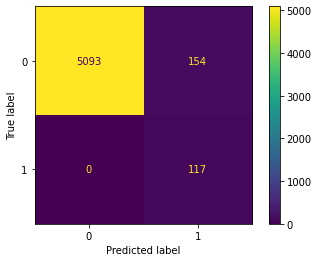

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay
label=['0','1']   #assign categories as a variable
mat=confusion_matrix(y_pred,y_test)
cmd=ConfusionMatrixDisplay(mat,display_labels=label)
cmd.plot()
print(mat)